In [1]:
import json
import pandas as pd
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [59]:
DATA_FILES = ['ITiCSE18.json', 'ITiCSE19.json', 'ITiCSE20.json', 'SIGCSE20.json']

In [60]:
# Load data
author_affiliations = {}
all_papers = []
for filename in DATA_FILES:
    with open(filename) as f:
        papers = json.load(f)
    for paper in papers:
        authors = []
        affiliations = []
        for author in paper['authors']:
            # TODO check if any author changed affiliations. Yep, that happens...
            name = author['name']
            affiliation = author['affiliation']
            author_affiliations[name] = affiliation
            authors.append(name)
            affiliations.append(affiliation)
        paper['authors'] = authors
        paper['affiliations'] = affiliations
        paper['venue'] = os.path.splitext(os.path.basename(filename))[0]
        all_papers.append(paper)
papers = pd.DataFrame(all_papers)
papers.head()

,title,link,abstract,authors,tags,affiliations,venue
0,Dancing rainbots: computing education with gir...,https://dl.acm.org/doi/10.1145/3197091.3211885,"We want women and girls to participate, thrive...",[Judy Robertson],"[barriers, inclusion, Women in computing]","[University of Edinburgh, UK]",ITiCSE18
1,A new era towards more engaging and human-like...,https://dl.acm.org/doi/10.1145/3197091.3211886,Engagement of learners in computer-based tutor...,[Maria Virvou],"[personalisation, artificial intelligence, Com...","[University of Piraeus, Greece]",ITiCSE18
2,Improving complex task performance using a seq...,https://dl.acm.org/doi/10.1145/3197091.3197141,Online coding tools are an increasingly common...,"[Andrew Luxton-Reilly, Michelle Craig, Paul De...","[assessment, compound assessment, novice progr...","[University of Auckland, New Zealand, Universi...",ITiCSE18
3,Syntax error based quantification of the learn...,https://dl.acm.org/doi/10.1145/3197091.3197121,Recent data-driven research has produced metri...,"[Luke Mathieson, Alireza Ahadi, Raymond Lister]","[programming, student mistakes, syntactic erro...","[University of Technology Sydney, Australia, U...",ITiCSE18
4,Programming: predicting student success early ...,https://dl.acm.org/doi/10.1145/3197091.3197101,"This paper describes a large, multi-institutio...","[Keith Quille, Susan Bergin]","[CS1, Programming, Predictors, Success, Comput...","[Institute of Technology Tallaght, Ireland / M...",ITiCSE18


In [61]:
# Define functions
def find_keywords(keywords):
    def find(row):
        search_str = row.title.lower() + row.abstract.lower() + ''.join(t.lower() for t in row.tags)
        for word in keywords:
            if word in search_str:
                return 1
        return 0
    return find

def papers_with_keywords_percent(papers, keywords):
    found = papers.apply(find_keywords(keywords), axis=1).sum()
    return 100 * found / len(papers)

def sort_by_occurrence(values, decreasing=True):
    c = Counter(values)
    return sorted(((count, v) for v, count in c.items()), reverse=decreasing)

# Papers related to automated feedback

In [62]:
search_keywords = [
    ['automatic', 'automated'],
    ['project'],
]
for keywords in search_keywords:
    print(f'{papers_with_keywords_percent(papers, keywords):.2f}% of the papers include the keywords: {", ".join(keywords)}')

6.71% of the papers include the keywords: automatic, automated
16.82% of the papers include the keywords: project


# Common Author Tags

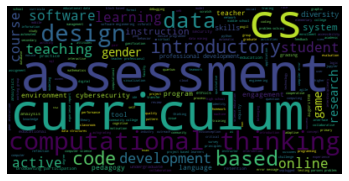

In [63]:
ignore = ['programming', 'education', 'learning', 'computer', 'science', 'computing', 'student', 'cs1']
all_tags = ' '.join(t.lower() for t in papers.tags.sum())
all_tags = ' '.join(w for w in all_tags.split() if w not in ignore)
wordcloud = WordCloud().generate(all_tags)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
pass

In [65]:
all_tags = [t.lower() for t in papers.tags.sum()]
for count, tag in sort_by_occurrence(all_tags):
    if count > 5:
        print(f'{tag} ({count} publications)')

computer science education (67 publications)
cs1 (62 publications)
computational thinking (47 publications)
assessment (37 publications)
computing education (34 publications)
programming (29 publications)
k-12 (27 publications)
education (26 publications)
introductory programming (25 publications)
active learning (22 publications)
curriculum (20 publications)
diversity (17 publications)
pedagogy (16 publications)
computer science (16 publications)
gender (15 publications)
retention (14 publications)
equity (14 publications)
broadening participation (14 publications)
professional development (13 publications)
k-12 education (13 publications)
gamification (13 publications)
cybersecurity (12 publications)
student engagement (11 publications)
project-based learning (11 publications)
novice programmers (11 publications)
data science (11 publications)
cybersecurity education (11 publications)
learning analytics (10 publications)
educational data mining (10 publications)
cs2 (10 publications)

In [92]:
def filter_tags_by_year(row):
    tags = row.tags
    year = int(row.venue[-2:]) + 2000
    return [{'year': year, 'tag': tag.lower()} for tag in tags]

tags_by_year = pd.DataFrame(papers.apply(filter_tags_by_year, axis=1).sum())
tag_counts = tags_by_year.groupby('tag').count()
popular_tags = list(tag_counts[tag_counts.year > 10].index)
tags_by_year = tags_by_year[tags_by_year.tag.isin(popular_tags)]
tags_by_year.groupby(['tag', 'year']).year.count().unstack().fillna(0)

year,2018,2019,2020
tag,,,
active learning,5.0,1.0,16.0
assessment,3.0,11.0,23.0
broadening participation,0.0,1.0,13.0
computational thinking,3.0,7.0,37.0
computer science,2.0,8.0,6.0
computer science education,6.0,17.0,44.0
computing education,1.0,10.0,23.0
cs1,9.0,15.0,38.0
curriculum,1.0,1.0,18.0


# Authors

In [69]:
for count, name in sort_by_occurrence(papers.authors.sum()):
    if count > 5:
        print(f'{name} ({count} publications)') 

Brett A. Becker (14 publications)
Monica M. McGill (13 publications)
Leo Porter (12 publications)
Tiffany Barnes (10 publications)
Nicholas Lytle (10 publications)
Arto Hellas (10 publications)
Diana Franklin (9 publications)
Kristy Elizabeth Boyer (8 publications)
Judy Sheard (8 publications)
Dan Garcia (8 publications)
Andrew Petersen (8 publications)
Mark Zarb (7 publications)
Juho Leinonen (7 publications)
Jean Salac (7 publications)
Christina Gardner-McCune (7 publications)
Andrew Luxton-Reilly (7 publications)
 Simon (7 publications)
Soohyun Nam Liao (6 publications)
Rebecca Vivian (6 publications)
Francesco Maiorana (6 publications)
Cruz Izu (6 publications)
Colleen M. Lewis (6 publications)
Aman Yadav (6 publications)
